<a href="https://colab.research.google.com/github/trinay-A/Temp/blob/main/LSTM%2BGRU%2BBiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving DataBTC2017.csv to DataBTC2017.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('/content/DataBTC2017.csv')
df = df[['DATE', 'CBBTCUSD']]
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

In [5]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

In [6]:
def create_dataset(dataset, window_size=60):
    X, y = [], []
    for i in range(len(dataset)-window_size-1):
        X.append(dataset[i:(i+window_size), 0])
        y.append(dataset[(i+window_size), 0])
    return np.array(X), np.array(y)

window_size = 60
train_X, train_y = create_dataset(train_data, window_size)
test_X, test_y = create_dataset(test_data, window_size)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [10]:
# # LSTM model
# lstm_model = Sequential()
# lstm_model.add(LSTM(50, input_shape=(window_size, 1)))
# lstm_model.add(Dense(1))
# lstm_model.compile(loss='mean_squared_error', optimizer='adam')
# lstm_model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

# # GRU model
# gru_model = Sequential()
# gru_model.add(GRU(50, input_shape=(window_size, 1)))
# gru_model.add(Dense(1))
# gru_model.compile(loss='mean_squared_error', optimizer='adam')
# gru_model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

# # Bidirectional LSTM model
# bilstm_model = Sequential()
# bilstm_model.add(Bidirectional(LSTM(50, input_shape=(window_size, 1))))
# bilstm_model.add(Dense(1))
# bilstm_model.compile(loss='mean_squared_error', optimizer='adam')
# bilstm_model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(window_size, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(train_X, train_y, epochs=200, batch_size=32, verbose=1)

# GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(window_size, 1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')
gru_model.fit(train_X, train_y, epochs=200, batch_size=32, verbose=1)

# Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(50, input_shape=(window_size, 1))))
bilstm_model.add(Dense(1))
bilstm_model.compile(loss='mean_squared_error', optimizer='adam')
bilstm_model.fit(train_X, train_y, epochs=200, batch_size=32, verbose=1)


Epoch 1/200
18/18 [==============================] - 3s 30ms/step - loss: 0.0350
Epoch 2/200
18/18 [==============================] - 1s 29ms/step - loss: 0.0081
Epoch 3/200
18/18 [==============================] - 1s 30ms/step - loss: 0.0045
Epoch 4/200
18/18 [==============================] - 1s 29ms/step - loss: 0.0034
Epoch 5/200
18/18 [==============================] - 1s 29ms/step - loss: 0.0031
Epoch 6/200
18/18 [==============================] - 1s 28ms/step - loss: 0.0029
Epoch 7/200
18/18 [==============================] - 1s 31ms/step - loss: 0.0029
Epoch 8/200
18/18 [==============================] - 1s 29ms/step - loss: 0.0026
Epoch 9/200
18/18 [==============================] - 1s 35ms/step - loss: 0.0024
Epoch 10/200
18/18 [==============================] - 1s 48ms/step - loss: 0.0023
Epoch 11/200
18/18 [==============================] - 1s 48ms/step - loss: 0.0022
Epoch 12/200
18/18 [==============================] - 1s 48ms/step - loss: 0.0021
Epoch 13/200
18/18 [=====

In [ ]:
# 1. epoch 100
# LSTM Train Score: 511.79 RMSE
# LSTM Test Score: 614.54 RMSE
# GRU Train Score: 433.17 RMSE
# GRU Test Score: 501.26 RMSE
# Bidirectional LSTM Train Score: 523.12 RMSE
# Bidirectional LSTM Test Score: 613.13 RMSE

# 2. epoch 200
# LSTM Train Score: 430.36 RMSE - imp
# LSTM Test Score: 527.27 RMSE -imp
# GRU Train Score: 433.67 RMSE - no
# GRU Test Score: 511.58 RMSE  - no
# Bidirectional LSTM Train Score: 404.54 RMSE - imp
# Bidirectional LSTM Test Score: 560.75 RMSE - imp

In [38]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(window_size, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(train_X, train_y, epochs=200, batch_size=16, verbose=1)

Epoch 1/200
36/36 [==============================] - 3s 31ms/step - loss: 0.0201
Epoch 2/200
36/36 [==============================] - 1s 31ms/step - loss: 0.0035
Epoch 3/200
36/36 [==============================] - 2s 42ms/step - loss: 0.0025
Epoch 4/200
36/36 [==============================] - 2s 42ms/step - loss: 0.0024
Epoch 5/200
36/36 [==============================] - 1s 30ms/step - loss: 0.0021
Epoch 6/200
36/36 [==============================] - 1s 30ms/step - loss: 0.0020
Epoch 7/200
36/36 [==============================] - 1s 29ms/step - loss: 0.0019
Epoch 8/200
36/36 [==============================] - 1s 31ms/step - loss: 0.0017
Epoch 9/200
36/36 [==============================] - 1s 28ms/step - loss: 0.0016
Epoch 10/200
36/36 [==============================] - 1s 29ms/step - loss: 0.0015
Epoch 11/200
36/36 [==============================] - 1s 30ms/step - loss: 0.0017
Epoch 12/200
36/36 [==============================] - 1s 29ms/step - loss: 0.0015
Epoch 13/200
36/36 [=====

In [41]:
# LSTM model predictions
train_predict_lstm = lstm_model.predict(train_X)
test_predict_lstm = lstm_model.predict(test_X)

train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
train_y_lstm = scaler.inverse_transform([train_y])
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
test_y_lstm = scaler.inverse_transform([test_y])

# Calculate the MSE
train_score_lstm = np.sqrt(mean_squared_error(train_y_lstm[0], train_predict_lstm[:,0]))
test_score_lstm = np.sqrt(mean_squared_error(test_y_lstm[0], test_predict_lstm[:,0]))

print('LSTM results:')
print('epochs=200, batch_size=16')

print('LSTM Train Score: %.2f RMSE' % (train_score_lstm))
print('LSTM Test Score: %.2f RMSE' % (test_score_lstm))

# GRU Train Score: 433.17 RMSE
# GRU Test Score: 501.26 RMSE
# Bidirectional LSTM Train Score: 404.54 RMSE - imp
# Bidirectional LSTM Test Score: 560.75 RMSE - imp

# 1. epoch 100
# LSTM Train Score: 511.79 RMSE
# LSTM Test Score: 614.54 RMSE

# 2. epoch 200
# LSTM Train Score: 430.36 RMSE - imp
# LSTM Test Score: 527.27 RMSE -imp

# 2. epoch 200, batch 16
# LSTM Train Score: 415.14 RMSE
# LSTM Test Score: 524.68 RMSE


3/3 [==============================] - 0s 12ms/step
LSTM results:
epochs=200, batch_size=16
LSTM Train Score: 434.63 RMSE
LSTM Test Score: 516.26 RMSE


In [ ]:
# GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(window_size, 1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')
gru_model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)



In [ ]:
# Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(50, input_shape=(window_size, 1))))
bilstm_model.add(Dense(1))
bilstm_model.compile(loss='mean_squared_error', optimizer='adam')
bilstm_model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

In [11]:
# LSTM model predictions
train_predict_lstm = lstm_model.predict(train_X)
test_predict_lstm = lstm_model.predict(test_X)

# GRU model predictions
train_predict_gru = gru_model.predict(train_X)
test_predict_gru = gru_model.predict(test_X)

# Bidirectional LSTM model predictions
train_predict_bilstm = bilstm_model.predict(train_X)
test_predict_bilstm = bilstm_model.predict(test_X)

# Inverse transform the predictions to get the actual values
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
train_y_lstm = scaler.inverse_transform([train_y])
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
test_y_lstm = scaler.inverse_transform([test_y])

train_predict_gru = scaler.inverse_transform(train_predict_gru)
train_y_gru = scaler.inverse_transform([train_y])
test_predict_gru = scaler.inverse_transform(test_predict_gru)
test_y_gru = scaler.inverse_transform([test_y])

train_predict_bilstm = scaler.inverse_transform(train_predict_bilstm)
train_y_bilstm = scaler.inverse_transform([train_y])
test_predict_bilstm = scaler.inverse_transform(test_predict_bilstm)
test_y_bilstm = scaler.inverse_transform([test_y])

# Calculate the MSE
train_score_lstm = np.sqrt(mean_squared_error(train_y_lstm[0], train_predict_lstm[:,0]))
test_score_lstm = np.sqrt(mean_squared_error(test_y_lstm[0], test_predict_lstm[:,0]))

train_score_gru = np.sqrt(mean_squared_error(train_y_gru[0], train_predict_gru[:,0]))
test_score_gru = np.sqrt(mean_squared_error(test_y_gru[0], test_predict_gru[:,0]))

train_score_bilstm = np.sqrt(mean_squared_error(train_y_bilstm[0], train_predict_bilstm[:,0]))
test_score_bilstm = np.sqrt(mean_squared_error(test_y_bilstm[0], test_predict_bilstm[:,0]))

print('LSTM Train Score: %.2f RMSE' % (train_score_lstm))
print('LSTM Test Score: %.2f RMSE' % (test_score_lstm))

print('GRU Train Score: %.2f RMSE' % (train_score_gru))
print('GRU Test Score: %.2f RMSE' % (test_score_gru))

print('Bidirectional LSTM Train Score: %.2f RMSE' % (train_score_bilstm))
print('Bidirectional LSTM Test Score: %.2f RMSE' % (test_score_bilstm))


3/3 [==============================] - 0s 14ms/step
LSTM Train Score: 430.36 RMSE
LSTM Test Score: 527.27 RMSE
GRU Train Score: 433.67 RMSE
GRU Test Score: 511.58 RMSE
Bidirectional LSTM Train Score: 404.54 RMSE
Bidirectional LSTM Test Score: 560.75 RMSE


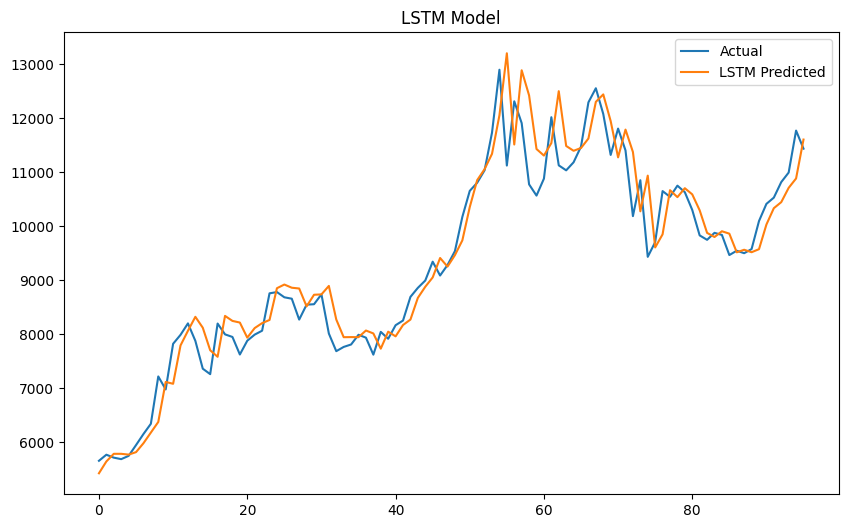

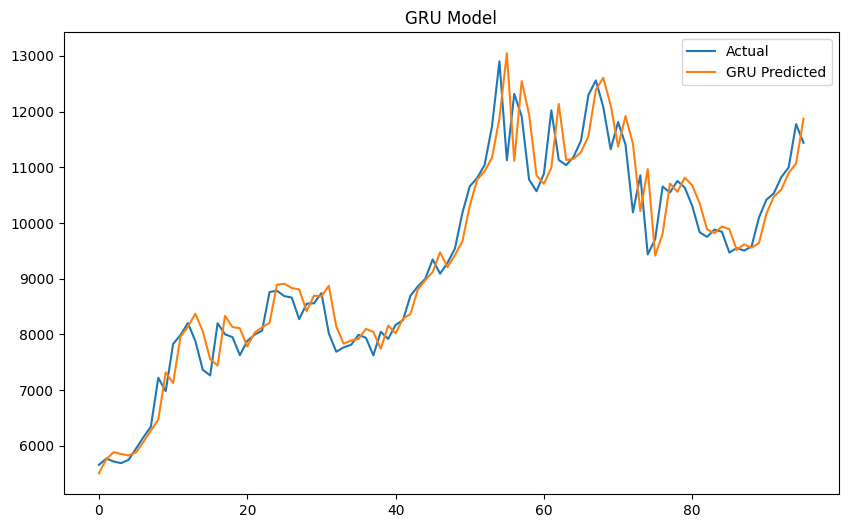

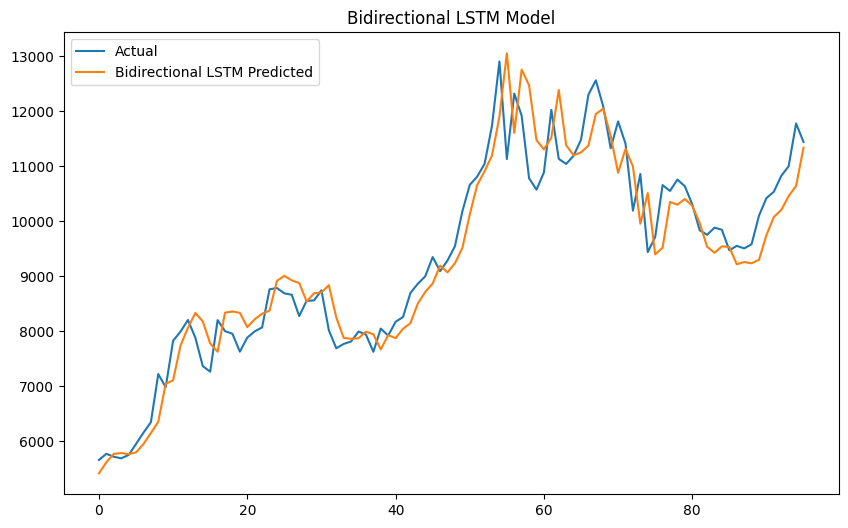

In [23]:
# Plot the actual prices and predicted prices
plt.figure(figsize=(10,6))
plt.plot(test_y_lstm[0])
plt.plot(test_predict_lstm[:,0])
plt.legend(['Actual', 'LSTM Predicted'])
plt.title('LSTM Model')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(test_y_gru[0])
plt.plot(test_predict_gru[:,0])
plt.legend(['Actual', 'GRU Predicted'])
plt.title('GRU Model')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(test_y_bilstm[0])
plt.plot(test_predict_bilstm[:,0])
plt.legend(['Actual', 'Bidirectional LSTM Predicted'])
plt.title('Bidirectional LSTM Model')
plt.show()
